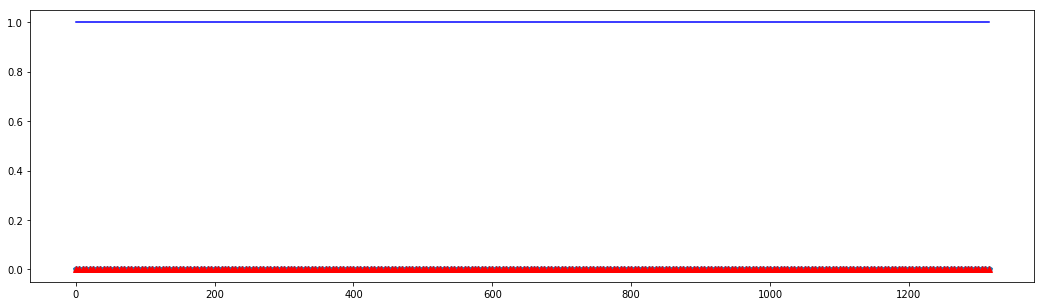

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~TomJacobs/0 or inside your plot.ly account where it is named 'Screen Time'


In [31]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import datetime
import numpy as np
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

# Define video function
def create_video(pipeline_in, input_video, output_video):
    # Process video
    video = VideoFileClip( input_video )
    video_processed = video.fl_image( pipeline_in )
    %time video_processed.write_videofile( output_video, audio=False )

# Pipeline
def pipeline( image ):
     
#    # Load the jpg file into a numpy array
#    image = face_recognition.load_image(image)

    # Find all facial features in all the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(image)

    for face_landmarks in face_landmarks_list:
        pil_image = Image.fromarray(image)
        d = ImageDraw.Draw(pil_image, 'RGBA')

        # Make the eyebrows into a nightmare
        d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
        d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
        d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
        d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

        # Gloss the lips
        d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
        d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
        d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
        d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

        # Sparkle the eyes
        d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
        d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

        # Apply some eyeliner
        d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
        d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

        return numpy.asarray(pil_image)
    return image


# Create video
#create_video(pipeline, "input_short.mov", "output.mp4" )

# Show video
#HTML("""<video width="960" height="540" controls><source src="{0}"></video>""".format( "output.mp4" ))

t = np.array(range(0, 22*60, 5))

jerry = np.array(([1] * int(22*60/5)))
george = np.array(([0] * int(22*60/5)))
elaine = np.array(([0] * int(22*60/5)))
kramer = np.array(([0] * int(22*60/5)))

width = 18
height = 5
plt.figure(figsize=(width, height))
plt.plot(t, jerry, 'b', 
         t, george, 'y', 
         t, elaine, 'p', 
         t, kramer, 'r^')
plt.show()


import plotly.plotly as py
import plotly.figure_factory as ff
import plotly 

plotly.tools.set_credentials_file(username='TomJacobs', api_key='juXJEk8RkE5bfaydkE4A')

# Add histogram data
x1 = np.random.randn(200)-2  
x2 = np.random.randn(200)  
x3 = np.random.randn(200)+2  
x4 = np.random.randn(200)+4  

# Group data together
hist_data = [x1, x2, x3, x4]
group_labels = ['Jerry', 'George', 'Elaine', 'Kramer']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Screen Time')
